# ML practice logistic regression

In [125]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df=pd.read_csv('Housing.csv')

In [127]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [128]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [129]:
df=df.dropna()

<Axes: xlabel='price', ylabel='Count'>

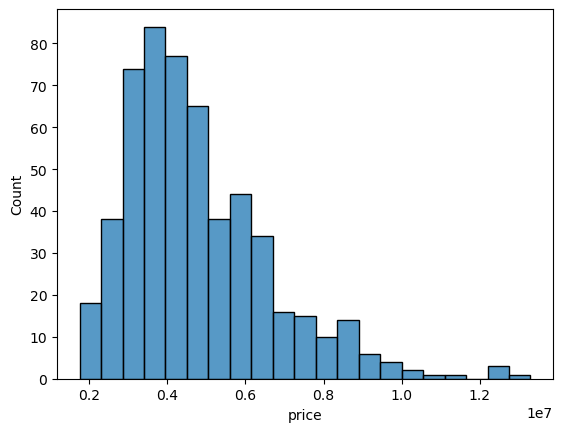

In [130]:
sns.histplot(df['price'])

In [131]:
df_adjusted=df.select_dtypes(include=['number'])
df_adjusted.head()

price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2

In [133]:
df_mod=df.applymap(lambda x:1 if x=='yes' else (0 if x=='no' else x))
df_mod['furnishingstatus']=df_mod['furnishingstatus'].map({'furnished':1, 'semi-furnished':0.5, 'unfurnished':0})
df_mod.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0               1.0  
1               1.0  
2               0.5  
3               1.0  
4               1.0

<Axes: >

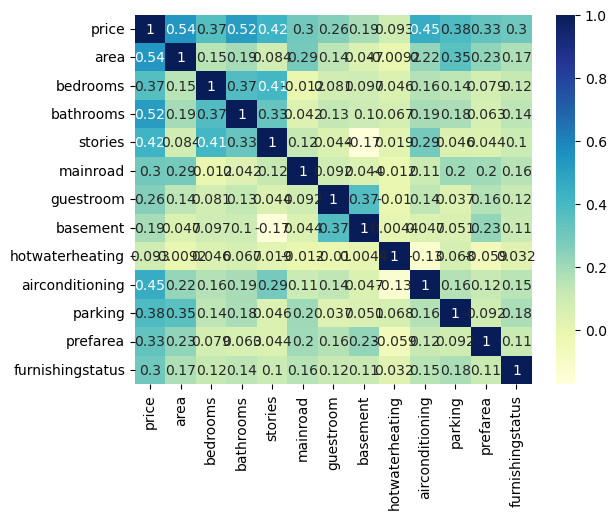

In [144]:
sns.heatmap(df_mod.corr(), annot=True, cmap='YlGnBu')

In [136]:
x=df_mod.drop(['price'], axis=1)
y=df['price']

Test code below used to remove specific columns

In [87]:
x=df_adjusted.drop(['price', 'stories','parking'], axis=1) # test code
y=df['price']
x.head()

area  bedrooms  bathrooms
0  7420         4          2
1  8960         4          4
2  9960         3          2
3  7500         4          2
4  7420         4          1

In [137]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [138]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [139]:
prediction=lm.predict(x_test)

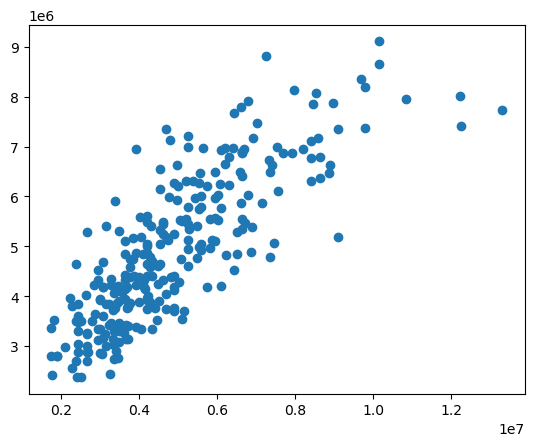

In [140]:
plt.scatter(y_test, prediction)
plt.show()

In [100]:
#plt.scatter(x_test,y_test,color='black')
#plt.plot(x_test,prediction,color='red')
#plt.show()

In [141]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 873140.9060491767
MSE: 1372853177398.2307
RMSE: 1171688.1741309122


In [142]:
print ('MAPE:', metrics.mean_absolute_percentage_error(y_test,prediction))

MAPE: 0.19320364519363814


In [143]:
mape= metrics.mean_absolute_percentage_error(y_test,prediction)

#accuracy of the model
accuracy=(1-mape)*100
print(f"Prediction accuracy: {accuracy:.2f}%")

Prediction accuracy: 80.68%
